Groupe A11
Loay YOUNES
Joachim AZZI

In [ ]:
def join_two_dataframes(home, away):
  return away.join(home, on = ["ID"], lsuffix=".A", rsuffix=".H")

In [ ]:
#Je vais cluster par équipes , : x , Nombre de matchs gagnés : y
import pandas as pd
import random
team_home = pd.read_csv('train_home_team_statistics_df.csv')
team_away = pd.read_csv('train_away_team_statistics_df.csv')
team_input = team_home[["ID", "LEAGUE", "TEAM_NAME"]]
#concaténer les deux sans répétition
team = join_two_dataframes(team_home, team_away)
#supprimer les valeurs manquantes
for c in team.columns:
    print(c)

ID
ID.A
LEAGUE.A
TEAM_NAME.A
TEAM_SHOTS_TOTAL_season_sum.A
TEAM_SHOTS_INSIDEBOX_season_sum.A
TEAM_SHOTS_OFF_TARGET_season_sum.A
TEAM_SHOTS_ON_TARGET_season_sum.A
TEAM_SHOTS_OUTSIDEBOX_season_sum.A
TEAM_PASSES_season_sum.A
TEAM_SUCCESSFUL_PASSES_season_sum.A
TEAM_SAVES_season_sum.A
TEAM_CORNERS_season_sum.A
TEAM_FOULS_season_sum.A
TEAM_YELLOWCARDS_season_sum.A
TEAM_REDCARDS_season_sum.A
TEAM_OFFSIDES_season_sum.A
TEAM_ATTACKS_season_sum.A
TEAM_PENALTIES_season_sum.A
TEAM_SUBSTITUTIONS_season_sum.A
TEAM_BALL_SAFE_season_sum.A
TEAM_DANGEROUS_ATTACKS_season_sum.A
TEAM_INJURIES_season_sum.A
TEAM_GOALS_season_sum.A
TEAM_GAME_WON_season_sum.A
TEAM_GAME_DRAW_season_sum.A
TEAM_GAME_LOST_season_sum.A
TEAM_SHOTS_TOTAL_season_average.A
TEAM_SHOTS_INSIDEBOX_season_average.A
TEAM_SHOTS_OFF_TARGET_season_average.A
TEAM_SHOTS_ON_TARGET_season_average.A
TEAM_SHOTS_OUTSIDEBOX_season_average.A
TEAM_PASSES_season_average.A
TEAM_SUCCESSFUL_PASSES_season_average.A
TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_av

In [ ]:
# Néttoyage des données

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random

# On ne garde que les flotants
X = team.select_dtypes(include=["float64"])
# On retire les ligne avec des NaN
print("len X avant drop na =", len(X))
X.dropna(inplace=True)
print("len X après drop na =", len(X))

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


len X avant drop na = 12303
len X après drop na = 8263


# Clustring 1 : KMeans

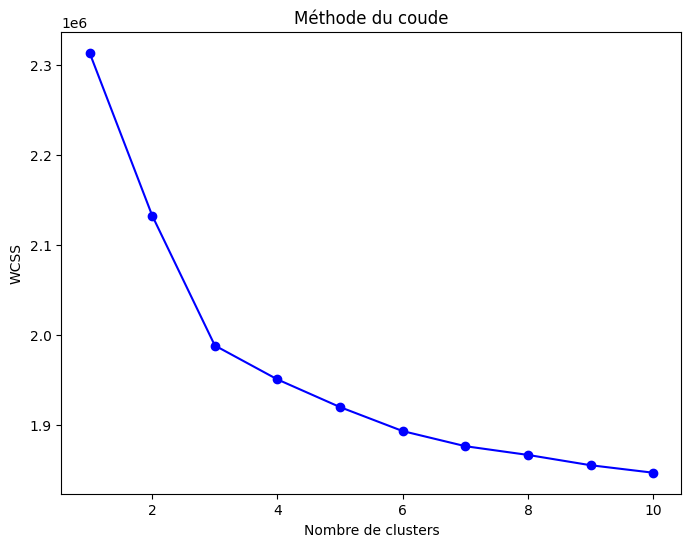

In [ ]:
# Methode du coude

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Étape 4 : Tracer la courbe WCSS vs. Nombre de clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', color='b')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

# On découvre que le nombre optimal de cluster est 3

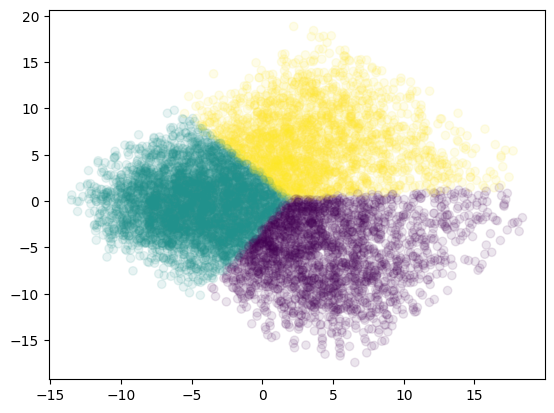

In [ ]:
from sklearn.decomposition import PCA

kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c = kmeans_model.labels_, cmap="viridis", alpha=0.1)
plt.show()

# Clustering 2 : CAH

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
cah_model = linkage(X, method="ward", metric="euclidean")

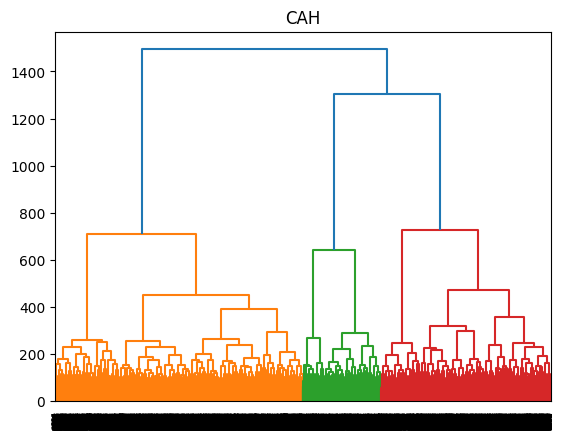

In [83]:
plt.title("CAH")
dendrogram(cah_model)
plt.show()

In [102]:
Y_train = pd.read_csv("Y_train.csv")
Y_train_sup = pd.read_csv("Y_train_supp.csv")
Y_train = Y_train.drop(columns=["ID"])
Y_train.dropna(inplace=True)
Y_train_sup.dropna(inplace=True)
Y_train_sup = Y_train_sup.drop(columns=["ID"])
print(Y_train_sup)

       GOAL_DIFF_HOME_AWAY
0                     -2.0
1                      0.0
2                     -1.0
3                      1.0
4                      0.0
...                    ...
12298                 -1.0
12299                 -1.0
12300                 -1.0
12301                  3.0
12302                  2.0

[12303 rows x 1 columns]


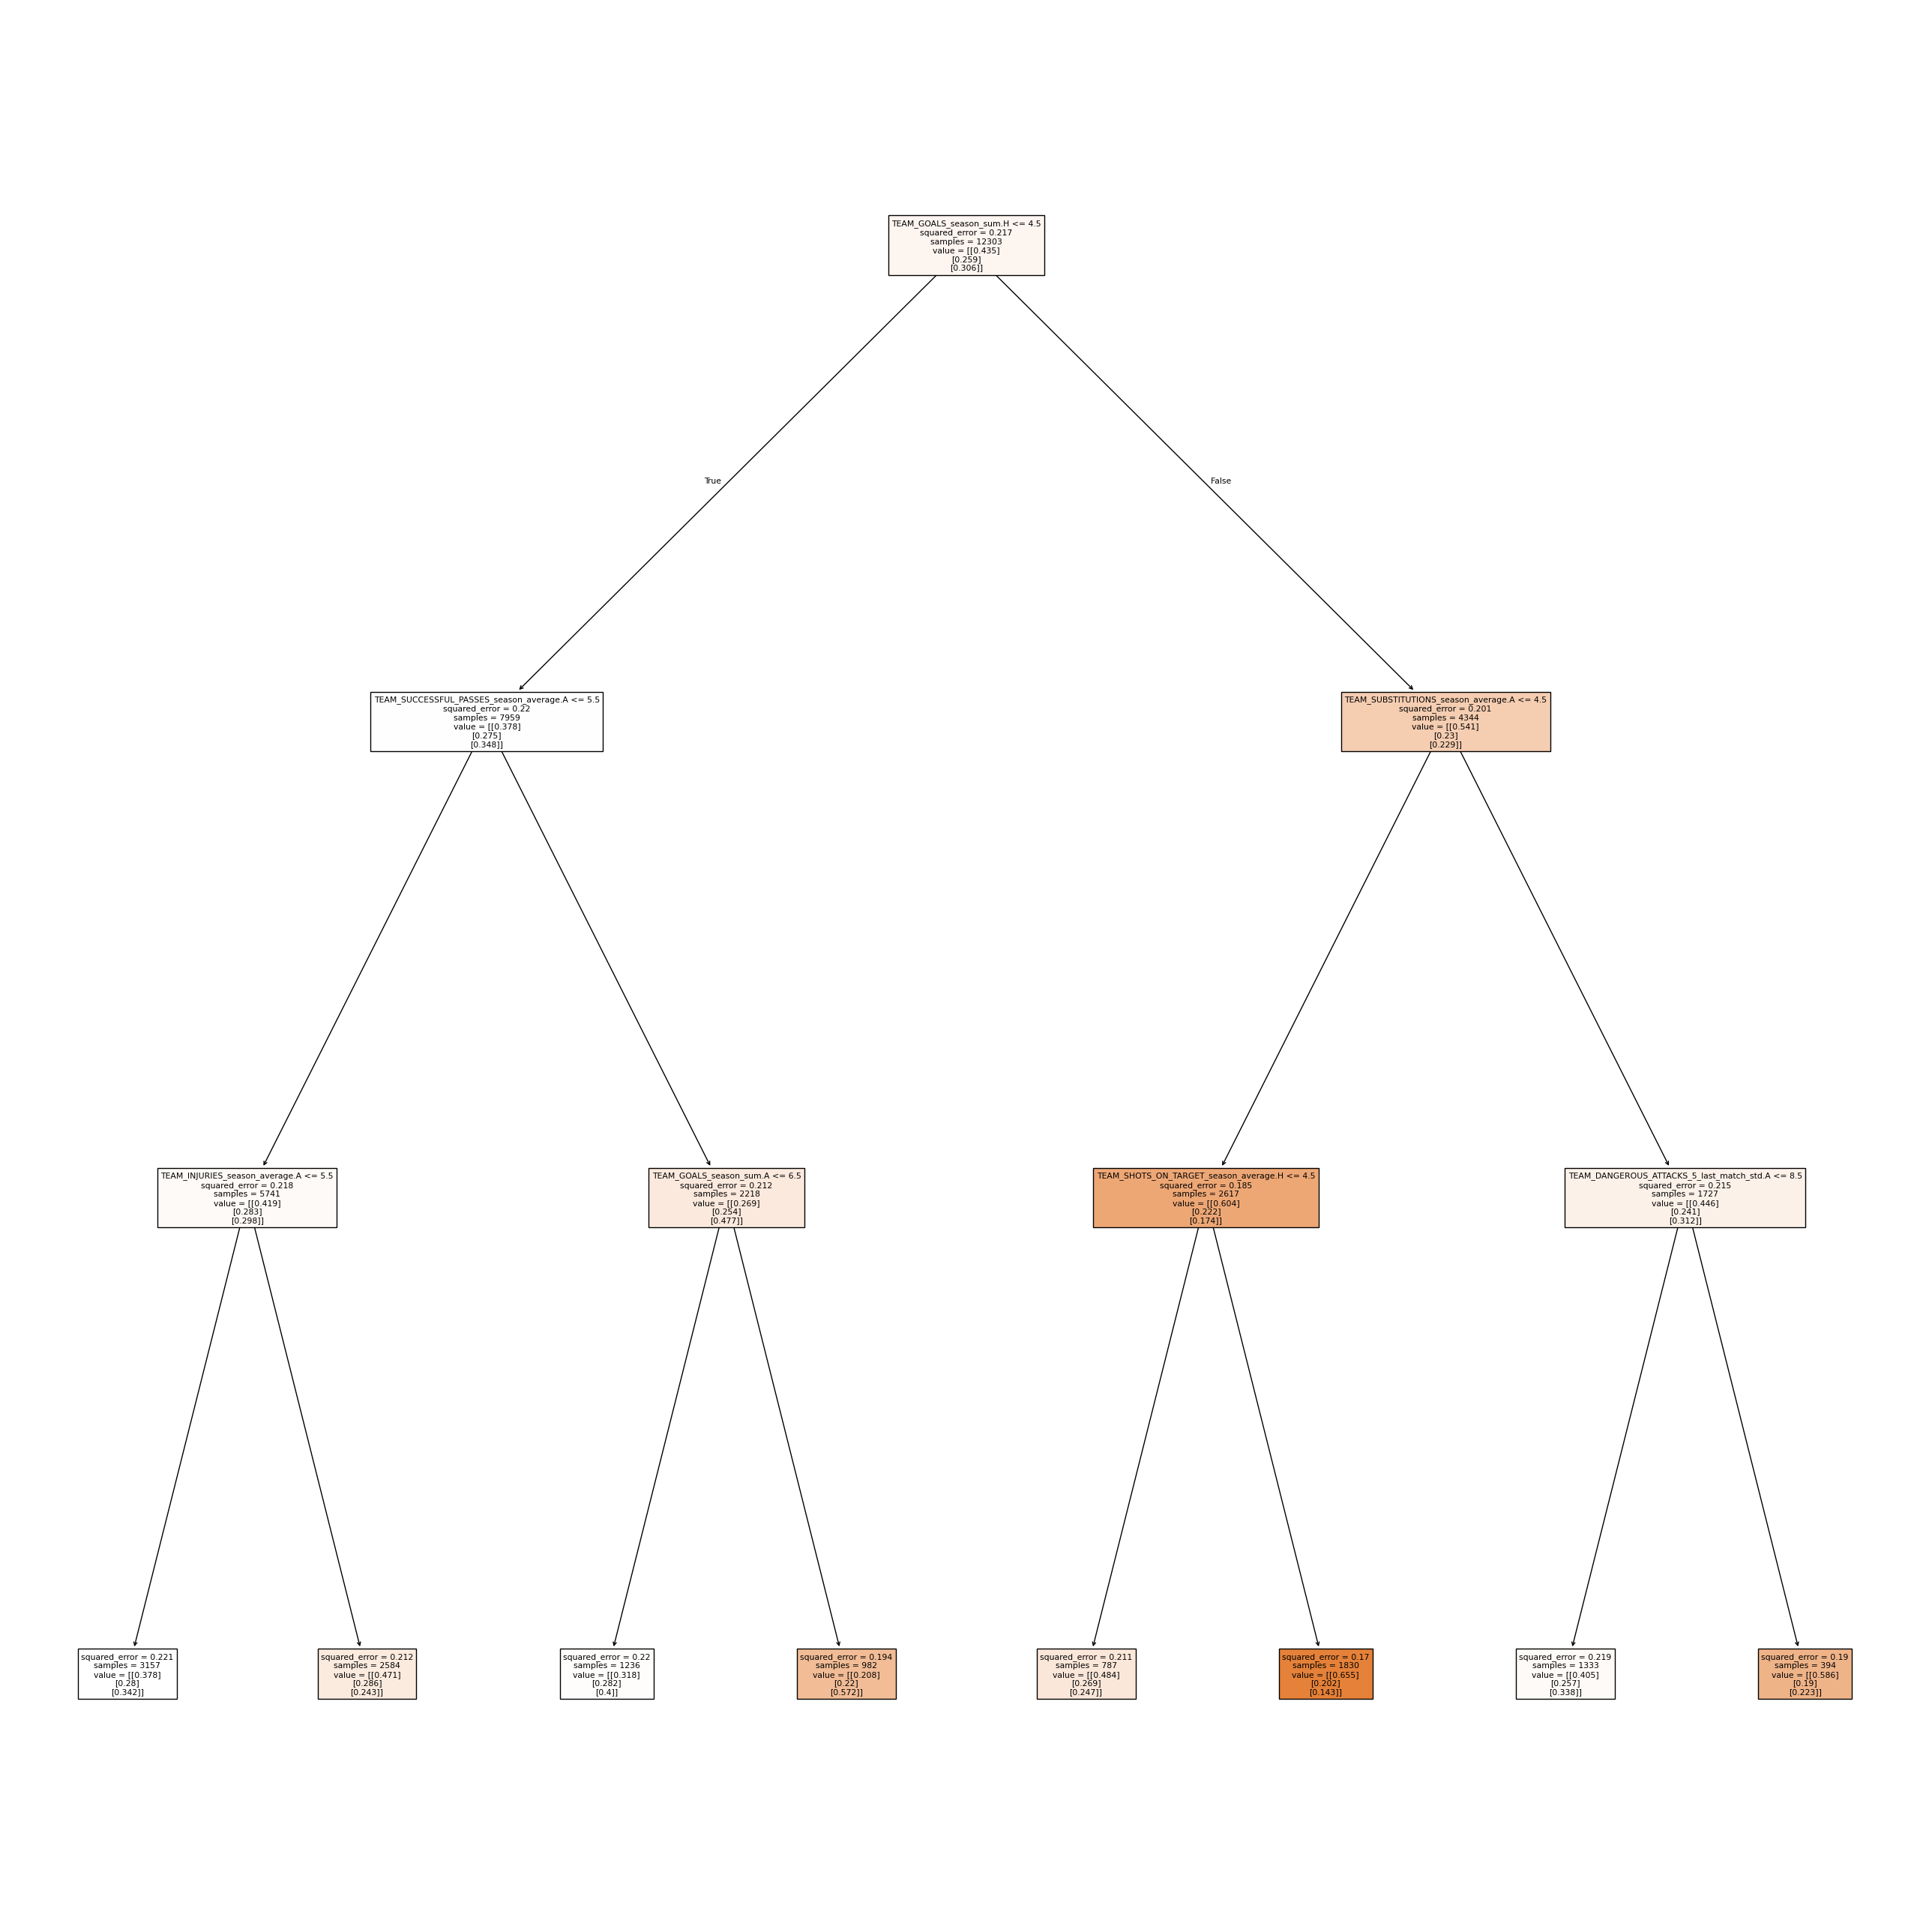

In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

X = team.select_dtypes(include = ["float64"])
reg = DecisionTreeRegressor(max_depth=3)
#Entrainer le modèle
reg.fit(X, Y_train)
plt.figure(figsize=(33, 33))
plot_tree(reg, feature_names = team.keys(), filled = True)
plt.show()



R-squared: -0.7629567439861219
MSE:  0.3918025317113791
RMSE:  0.6259413165076891


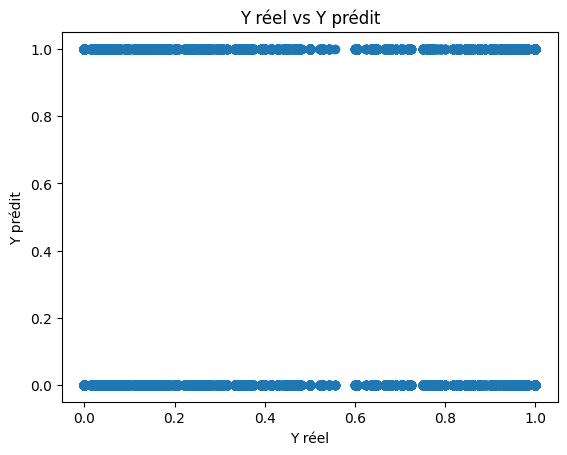

In [104]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#Entrainer un nouveau modèle avec hauteur =  (Nombre de features dans X_train 280 --> 280 * 280 = 78400 Après log2 (78400) = 16)
reg = DecisionTreeRegressor(max_depth=14)
team_home
#Entrainer le modèle
reg.fit(X, Y_train)
reg
#Données du X test
test_home = pd.read_csv("test_home_team_statistics_df.csv")
test_away = pd.read_csv("test_away_team_statistics_df.csv")
test = join_two_dataframes(test_home, test_away)
test = test.select_dtypes(include = ["float64"])
test = test.drop("ID.H" , axis = 1)

#Prédire Y_test
y1 = reg.predict(test)
Y_test = pd.read_csv("Y_test.csv")
Y_test = Y_test.drop(columns=["ID"])

#Pour voir l'erreur entre Y_test et la valeur prédite
mse = mean_squared_error(Y_test, y1)
score =  r2_score(Y_test, y1)

print("R-squared:", score)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))
plt.scatter(y1, Y_test)
plt.title("Y réel vs Y prédit")
plt.xlabel("Y réel")
plt.ylabel("Y prédit")

plt.show()

#### Mon raisonnement :
### Dans le benchmark après de tester xgb.plot_importance
### J'ai trouvé 10 features très importants
### Les garder juste j'aurai un modèle qui moins overfit.